## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [24]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [26]:
data.isna().values.any()

False

**Категориальные: status, credit_history, purpose, savings, personal_status_sex, other_debtors, property, other_installment_plans, housing, job
Бинарные: telephone, foreign_worker, credit_risk
Количественные: duration, amount, age, number_credits, people_liable
Порядковые: employment_duration, installment_rate**

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [27]:
data.groupby(by=['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [28]:
print(data[(data["age"] < 30) & (data["housing"] == "rent")].shape[0]/data[data["age"] < 30].shape[0])
print(data[(data["age"] > 40) & (data["housing"] == "rent")].shape[0]/data[data["age"] > 40].shape[0])

0.6666666666666666
0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [29]:
data[(data["foreign_worker"] == "yes") & ( (data["number_credits"] == "4-5") | (data["number_credits"] == ">=6") )].shape[0]

1

In [30]:
data["number_credits"].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

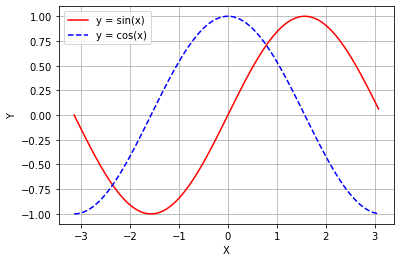

In [9]:
x = np.arange(-np.pi,np.pi,np.pi/50)
plt.plot(x,np.sin(x),"r",label = 'y = sin(x)')
plt.plot(x,np.cos(x),"b--",label = 'y = cos(x)')
plt.grid(True)
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc = 'best')
plt.show()


### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [10]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

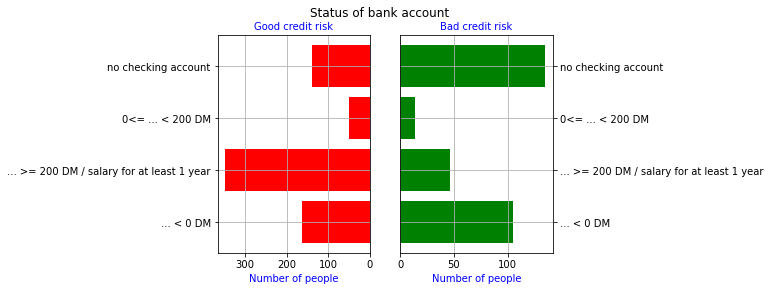

In [11]:
x = data[data['credit_risk'] == "good"]['status']
x1 = data[data['credit_risk'] == "bad"]['status']
fig,(ax, ax1) = plt.subplots(1,2)
ax1.barh(sorted(list(x1.unique())),x1.value_counts().sort_index(),color = 'g')
ax.barh(sorted(list(x.unique())), x.value_counts().sort_index(),color = 'r')
ax.set_xlabel('Number of people',fontsize = 10,color = 'b')
ax1.set_xlabel('Number of people',fontsize = 10,color = 'b')
ax.set_title('Good credit risk',fontsize = 10,color = 'b')
ax1.set_title('Bad credit risk',fontsize = 10, color = 'b')
ax.grid(True)
ax1.grid(True)
ax.invert_xaxis()
ax1.yaxis.tick_right()
fig.suptitle('Status of bank account')
plt.show()


### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

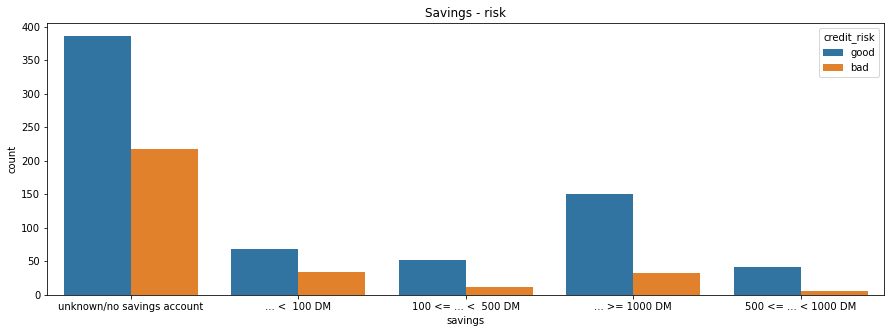

In [13]:
ax = plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'savings', hue = 'credit_risk', data = data)
ax.set_title('Savings - risk')
plt.show()


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

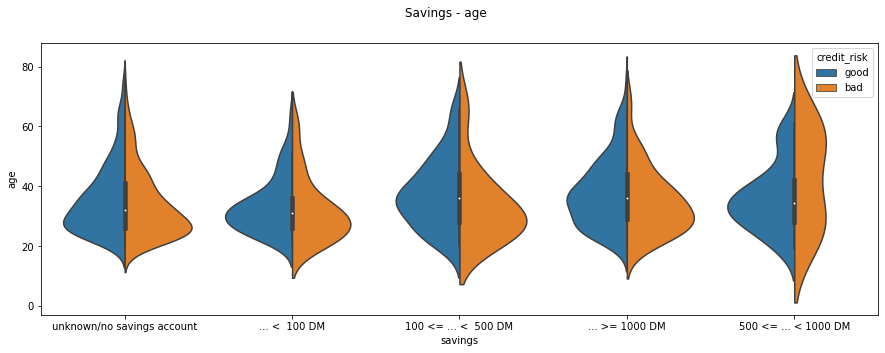

In [14]:
ax = plt.figure(figsize = (15,5))
sns.violinplot(x = 'savings', y = 'age', hue = 'credit_risk', data = data, split=True, axes = ax)
ax.suptitle('Savings - age')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

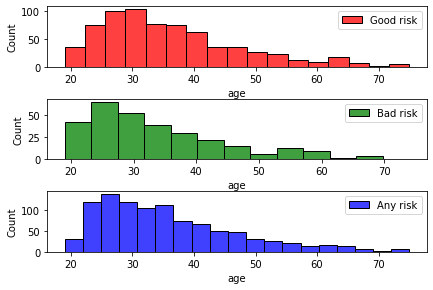

In [15]:
fig,(ax, ax1,ax2) = plt.subplots(3,1)
fig.tight_layout()
sns.histplot(x = 'age',data = data[data['credit_risk'] == 'good'],ax = ax,color = 'r', label = 'Good risk')
sns.histplot(x = 'age',data = data[data['credit_risk'] == 'bad'],ax = ax1, color = 'g',label = 'Bad risk')
sns.histplot(x = 'age',data = data, ax = ax2,color = 'b', label = 'Any risk')
ax.legend()
ax1.legend()
ax2.legend()
plt.show()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

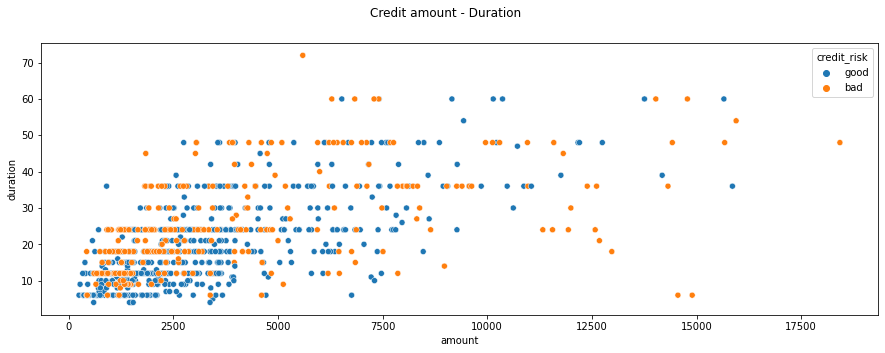

In [16]:
ax = plt.figure(figsize = (15,5))
ax.suptitle('Credit amount - Duration')
ax = sns.scatterplot(x = 'amount', y = 'duration', hue = 'credit_risk', data = data)
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

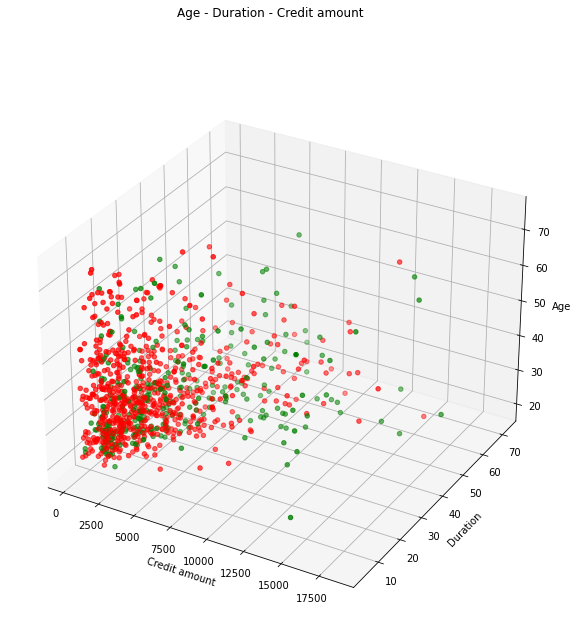

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Age - Duration - Credit amount')
ax = fig.add_subplot(111, projection = '3d')
cmap = sns.color_palette("husl", 256).as_hex()
coloring = data['credit_risk'].replace(['good','bad'], ['r','g'])
ax.scatter(data['amount'],data['duration'],data['age'], c = coloring)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [18]:
nonfactor = ('telephone', 'foreign_worker', 'credit_risk', 'employment_duration', 'installment_rate')
numeric = ('duration', 'amount', 'age')
for feature in data.columns:
    if  feature not in nonfactor and feature not in numeric:
        one_hot_temp = pd.get_dummies(data[feature])
        data = data.drop(feature,axis = 1)
        data = pd.concat([data,one_hot_temp],axis = 1)
    elif feature in nonfactor:
        temp = list(data[feature].unique())
        data[feature] = data[feature].replace(temp, np.arange(len(temp)))


                                      

In [19]:
data

,duration,amount,employment_duration,installment_rate,age,telephone,foreign_worker,credit_risk,... < 0 DM,... >= 200 DM / salary for at least 1 year,...,1,2-3,4-5,>= 6,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident,0 to 2,3 or more
0,18,1049,0,0,21,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,9,2799,1,1,36,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,12,841,2,1,23,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,12,2122,1,2,39,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,12,2171,1,0,38,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1,1,21,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
996,24,2303,4,0,45,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
997,21,12680,4,0,30,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
998,12,6468,3,1,52,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['amount'] = label.fit_transform(pd.cut(data['amount'].astype(int), 5))
data['age'] = label.fit_transform(pd.cut(data['age'].astype(int), 5))

In [21]:
data['amount'] = data['amount'].apply(lambda x: x + 1)
data['age'] = data['age'].apply(lambda x: x + 1)
data['duration'] = data['duration'].apply(lambda x: x // 12)

data

,duration,amount,employment_duration,installment_rate,age,telephone,foreign_worker,credit_risk,... < 0 DM,... >= 200 DM / salary for at least 1 year,...,1,2-3,4-5,>= 6,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident,0 to 2,3 or more
0,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,1,1,1,2,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,1,2,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,1,1,1,2,2,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,1,1,1,0,2,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
996,2,1,4,0,3,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
997,1,4,4,0,1,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
998,1,2,3,1,3,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [22]:
def predict(Xtest: np.array) -> np.array:
    predict_list = (10,3,-3,5,3,-3,8,3,-5,-6,2,5,5,-10,-5,10,5,4,-3,-1,2,-1,3,-6,-2,4,-3,-4,4,3,6,-5,4,-2,-2,4,3,3,-3,2,3,5,5,2,1,2,-2,2,-2,2,3,4,-3,1,3,5,7,10,10,-8,-5,2)
    ans_arr = list()
    for i in Xtest:
        if sum(i * predict_list) > 68:
            ans_arr.append(1)
        else:
            ans_arr.append(0)       
    return np.array(ans_arr)
        
            
    
    
    
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))


0.688